In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

# Define a new YOLO model structure (YOLOv8 Nano) and train from scratch
model = YOLO('yolov8n.yaml')  # Specify model structure using a YAML configuration

# Train the model
model.train(
    data='/content/drive/MyDrive/InnoSD/data.yaml',  # Path to your data.yaml file
    epochs=50,                              # Number of epochs
    imgsz=640,                              # Input image size
    batch=16,                               # Batch size
    device='cuda',                               # Use GPU (set to 'cpu' if no GPU is available)
    workers=2,                              # Number of dataloader workers
    optimizer='Adam',                        # Optimizer for training
    pretrained=False                        # Disable pre-trained weights
)

In [ ]:
metrics = model.val()
print(metrics)  # Print evaluation metrics (mAP, precision, recall, etc.)
model.save('/content/yolo_trained.pt')

Ultralytics 8.3.57 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/drive/MyDrive/InnoSD/datayolo/labels/val.cache... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:06<00:00,  1.19it/s]


                   all        123        325      0.723      0.662      0.675      0.288
Speed: 1.0ms preprocess, 11.1ms inference, 0.0ms loss, 7.7ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7810ad3378b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03


image 1/1 /content/drive/MyDrive/test1.jpg: 544x640 2 Tas_Vars, 17.1ms
Speed: 6.5ms preprocess, 17.1ms inference, 2.2ms postprocess per image at shape (1, 3, 544, 640)


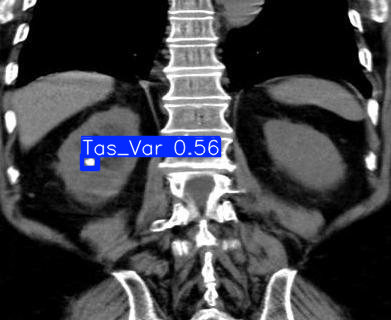

In [ ]:
trained_model = YOLO('/content/yolo_trained.pt')
# Path to the test image
img_path = '/content/drive/MyDrive/test1.jpg'  # Replace with your image path

# Run the model on the test image
results = model.predict(img_path)
result = results[0]

# Show the results (with bounding boxes, labels, and confidence scores)
result.show()